In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [24]:
# 参数设置
S0 = 1      # 初始资产价格
T = 35.0        # 总时长（例如1年）
r = 0.06      # 风险无关利率
l = 0.0125     #risk charge
sigma = 0.2    # 波动率
dt = 0.01      # 时间步长

M = 1000
g = 0
lamda = 1/35

In [25]:
def stock_SDE(S0, r, sigma, dt, t, l):
    N = int(t / dt)
    if N == 0:
        return S0
    
    S = np.zeros(N)
    S[0] = S0
    for i in range(1, N):
        Z = np.random.normal(0, 1)
        S[i] = S[i-1] * np.exp((r - l - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return S[-1]


In [26]:
def average_payoff(g, t, S0, r, sigma, dt, l):
    S_t = stock_SDE(S0, r, sigma, dt, t, l)  # 使用时间t调用stock_SDE
    return  max(math.exp(g * t)- S_t, 0 )

In [27]:
def f(t):
    single_V = lamda * math.exp(-lamda*t)*math.exp(-r*t)*average_payoff(g, t,S0,r,sigma,dt,l)
    return single_V
results = []
errors = []
def int_death_payoff(f):
# 计算定积分
    result, error = spi.quad(f, 0, T)  # 从0积分到T
    print("积分结果:", result)
    # print("误差估计:", error)
    results.append(result)
    errors.append(error)
    return result

In [28]:
i = 0
G = 0

average_off_plot = []
for i in range(M):  
    G = G + int_death_payoff(f)
    i = i + 1
    average_off_plot.append(G/i)
death_payoff = G/M

# print("death_payoff = G/N", death_payoff)
print("last average_off_plot", average_off_plot[-1])

/tmp/ipykernel_920/2527195465.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, error = spi.quad(f, 0, T)  # 从0积分到T


积分结果: 0.026929105870534698
积分结果: 0.028608368945428828
积分结果: 0.02355023393211036
积分结果: 0.03388319587017403
积分结果: 0.030308200130660913
积分结果: 0.02708712666944346
积分结果: 0.035138083681785955
积分结果: 0.02722283384897689
积分结果: 0.024516655646168044
积分结果: 0.029072828819609854
积分结果: 0.027971265439328638
积分结果: 0.027439686948716673
积分结果: 0.029416042455663188
积分结果: 0.03181832759824721
积分结果: 0.024152788781665758
积分结果: 0.023181155101210986
积分结果: 0.03360290832574252
积分结果: 0.023979790407513753
积分结果: 0.028489271771213246
积分结果: 0.022599258741308158
积分结果: 0.026926337135827306


/tmp/ipykernel_920/2527195465.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = spi.quad(f, 0, T)  # 从0积分到T


积分结果: 0.02066682874463964
积分结果: 0.01701736499456526
积分结果: 0.026288929051232007
积分结果: 0.025244551452937723
积分结果: 0.029506361344088752
积分结果: 0.025708111906672465
积分结果: 0.026035309332004104
积分结果: 0.03128200069265058
积分结果: 0.024931424389895113
积分结果: 0.02988475431182399
积分结果: 0.02284960412857992
积分结果: 0.026885034246520976
积分结果: 0.027833007204961277
积分结果: 0.02246827740159517
积分结果: 0.027061541115281487
积分结果: 0.0274253888712602
积分结果: 0.027500426245880304
积分结果: 0.026556310973719435
积分结果: 0.030199670673850782
积分结果: 0.03143269979384899
积分结果: 0.025817566456894522
积分结果: 0.049658549421900317
积分结果: 0.02523494982247077
积分结果: 0.029041231148066796
积分结果: 0.027710728768691448
积分结果: 0.030586342739945645
积分结果: 0.025999141657594167
积分结果: 0.02485905329484243
积分结果: 0.024718985885419657
积分结果: 0.026657630068970355
积分结果: 0.034031277130252
积分结果: 0.022322128894275532
积分结果: 0.021655047078529693
积分结果: 0.02296461819812095
积分结果: 0.029998476555944984
积分结果: 0.026511382514702725
积分结果: 0.027014691842493478
积分结果: 0.02279286

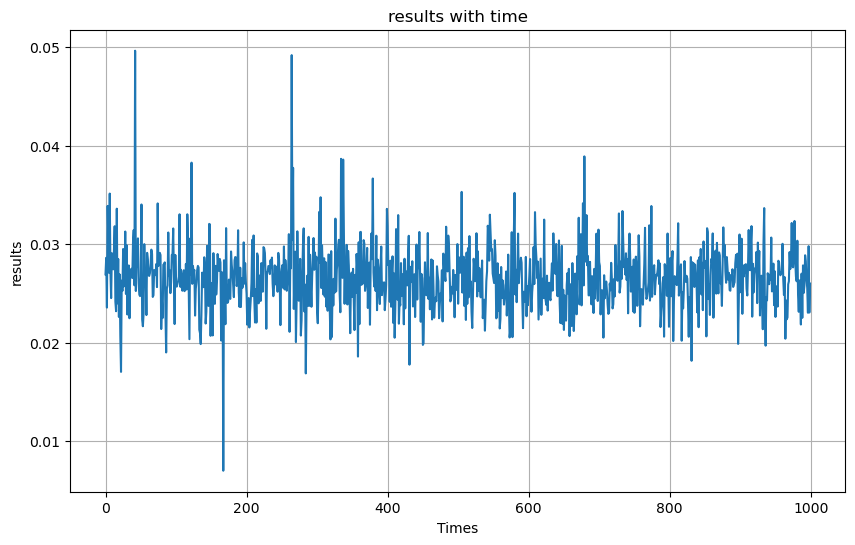

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,M,1), results)
plt.xlabel('Times')
plt.ylabel('results')
plt.title('results with time')
plt.grid(True)
plt.show()

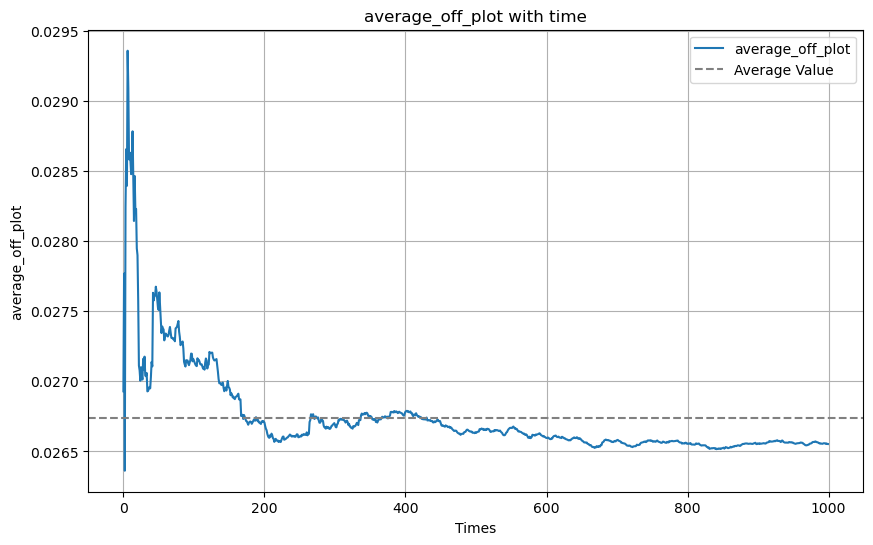

In [32]:
average_value = np.mean(average_off_plot)

# 绘制average_off_plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, M, 1), average_off_plot, label='average_off_plot')
plt.axhline(average_value, color='gray', linestyle='--', label='Average Value')  # 添加平均值的虚线
plt.xlabel('Times')
plt.ylabel('average_off_plot')
plt.title('average_off_plot with time')
plt.grid(True)
plt.legend()  # 添加图例
plt.show()
